In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
file_path = "./cc_default.csv"
df = pd.read_csv(file_path)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', '         "BILL_AMT4"', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT'],
      dtype='object')

In [5]:
X = df.copy()
X = X.drop(columns=["DEFAULT"])
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [6]:
y = df["DEFAULT"].values   
y = y.reshape(-1,1)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
print(len(X_train)/30000 )
print(len(X_test)/30000 )

0.75
0.25


In [9]:
X_scaler = StandardScaler()

In [10]:
X_scaler.fit(X_train)

StandardScaler()

In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Create a neural network model with 23 features 

In [13]:
# Define the model 
number_inputs = 23 
number_nodes = 69

neural_network = Sequential()
neural_network.add(Dense(units=number_nodes, input_dim=number_inputs, activation="relu"))
neural_network.add(Dense(1, activation="sigmoid"))



In [14]:
# Compile model 
neural_network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model = neural_network.fit(X_train_scaled, y_train, epochs=100)

Train on 22500 samples
Epoch 1/100
22500/22500 [==============================] - 2s 102us/sample - loss: 0.4779 - accuracy: 0.8047
Epoch 2/100
22500/22500 [==============================] - 1s 59us/sample - loss: 0.4505 - accuracy: 0.8158
Epoch 3/100
22500/22500 [==============================] - 1s 59us/sample - loss: 0.4442 - accuracy: 0.8176
Epoch 4/100
22500/22500 [==============================] - 1s 60us/sample - loss: 0.4402 - accuracy: 0.8170
Epoch 5/100
22500/22500 [==============================] - 1s 65us/sample - loss: 0.4375 - accuracy: 0.8192
Epoch 6/100
22500/22500 [==============================] - 1s 59us/sample - loss: 0.4352 - accuracy: 0.8192
Epoch 7/100
22500/22500 [==============================] - 1s 51us/sample - loss: 0.4344 - accuracy: 0.8194
Epoch 8/100
22500/22500 [==============================] - 1s 52us/sample - loss: 0.4328 - accuracy: 0.8196
Epoch 9/100
22500/22500 [==============================] - 1s 51us/sample - loss: 0.4319 - accuracy: 0.8187s - l

22500/22500 [==============================] - 1s 50us/sample - loss: 0.4085 - accuracy: 0.8272
Epoch 76/100
22500/22500 [==============================] - 1s 50us/sample - loss: 0.4078 - accuracy: 0.8271
Epoch 77/100
22500/22500 [==============================] - 1s 52us/sample - loss: 0.4090 - accuracy: 0.8271
Epoch 78/100
22500/22500 [==============================] - 1s 51us/sample - loss: 0.4082 - accuracy: 0.8265
Epoch 79/100
22500/22500 [==============================] - 1s 51us/sample - loss: 0.4082 - accuracy: 0.8270
Epoch 80/100
22500/22500 [==============================] - 1s 51us/sample - loss: 0.4077 - accuracy: 0.8273
Epoch 81/100
22500/22500 [==============================] - 1s 50us/sample - loss: 0.4071 - accuracy: 0.8272
Epoch 82/100
22500/22500 [==============================] - 1s 51us/sample - loss: 0.4072 - accuracy: 0.8265
Epoch 83/100
22500/22500 [==============================] - 1s 50us/sample - loss: 0.4080 - accuracy: 0.8267
Epoch 84/100
22500/22500 [======

AttributeError: 'AxesSubplot' object has no attribute 'show'

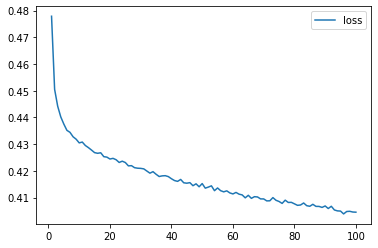

In [16]:
import matplotlib 

df_plot = pd.DataFrame(model.history, index=range(1,len(model.history["loss"]) + 1))

df_plot.plot(y="loss").show()





In [ ]:
df_plot.plot(y="accuracy")

In [ ]:
model_loss, model_accuracy = neural_network.evaluate(X_test_scaled, y_test, verbose=2)
print(f"loss {model_loss} Accuracy: {model_accuracy}")